<a href="https://colab.research.google.com/github/Mario-Canon-Ayala/TDO/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Suport Vector Machines
## Introducción
El objetivo de este tutorial es practicar la implementación de máquinas de vectores de soporte (SVM, por sus siglas en inglés) en Python.

Importaremos varios módulos comunes que utilizaremos a lo largo del ejercicio. `pandas` para la manipulación de dataframes, `matplotlib` para la generación de gráficos y `numpy` para el manejo de arreglos y operaciones de álgebra lineal:


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl #also import the whole module as we will use other functions not in pyplot.
import matplotlib.pyplot as plt
%matplotlib inline

En este laboratorio utilizaremos el módulo `SVC` del paquete `sklearn.svm` para demostrar el clasificador de vectores de soporte (*Support Vector Classifier*) y la máquina de vectores de soporte (*SVM*).


In [1]:
from sklearn.svm import SVC

## Clasificador de Vectores de Soporte (Support Vector Classifier)

La función `SVC()` puede usarse para ajustar un clasificador de vectores de soporte cuando se utiliza el argumento `kernel="linear"`.  
El argumento `C` nos permite especificar el costo de una violación al margen.  

- Cuando el argumento `C` es pequeño, los márgenes serán amplios y muchos vectores de soporte estarán sobre el margen o lo violarán.  
- Cuando el argumento `C` es grande, los márgenes serán estrechos y habrá pocos vectores de soporte sobre el margen o violándolo.  

Podemos usar la función `SVC()` para ajustar el clasificador de vectores de soporte para un valor dado del parámetro `C`.  
Aquí demostramos el uso de esta función en un ejemplo bidimensional, de manera que podamos graficar la frontera de decisión resultante.  

Empecemos generando un conjunto de observaciones que pertenecen a dos clases:


In [4]:
# Generating random data: 100 observations of 2 features and divide into two classes.
np.random.seed(42)
X = np.random.randn(100,2)
y = np.repeat([1,-1], 50)

X[y == 1] = X[y == 1] - 2
#X[y == -1] = X[y == -1]+2

Grafiquemos los datos para ver si las clases son linealmente separables:


Text(0, 0.5, 'X2')

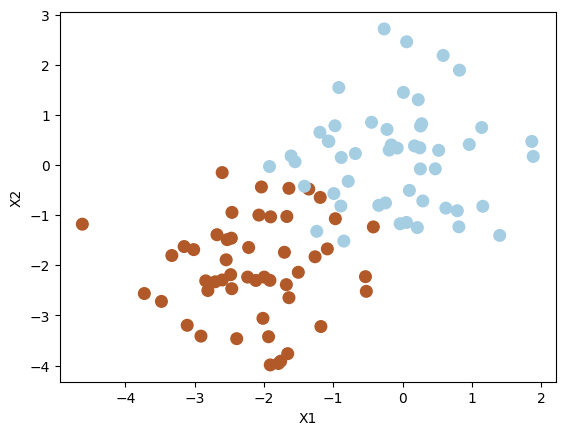

In [5]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

No, no son linealmente separables. A continuación, ajustamos el clasificador de vectores de soporte:

In [6]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

Ahora podemos graficar el clasificador de vectores de soporte.  
Para ello, podemos crear una función en Python que genere gráficos claros de los SVM de la siguiente manera:


In [7]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Recuerda que las funciones en Python se crean con `def`. Además, la indentación es informativa en Python y obtendrás un mensaje de error si no se respeta.  
Llamamos a la función `plot_svc`.  

Existen varias funciones del módulo `matplotlib.pyplot` que utilizamos, como `contourf` (para dibujar contornos rellenos), `scatter` (para graficar diagramas de dispersión), `xlim` y `ylim` (para establecer los rangos de los ejes), y `xlabel` y `ylabel` (para etiquetar los ejes).  
También se usa la función `show`, que es necesaria para mostrar la figura.  

Además, utilizamos varias funciones de `numpy` como `meshgrid` (para generar matrices de coordenadas), `arange` (para formar valores espaciados uniformemente dentro de un intervalo dado) y `reshape` (para cambiar la forma de un arreglo).  

La función `plot_svc()` recibe como primer argumento un objeto `SVC`, que acabamos de aprender a usar.  
La mejor manera de aprender un nuevo lenguaje es entendiendo cómo funciona el código ya implementado. En una consola *IPython* puedes usar `help()` para acceder a la documentación de referencia. A veces es más fácil simplemente googlear la función.  

Ahora llamemos a la función `plot_svc()` para graficar el clasificador de vectores de soporte:


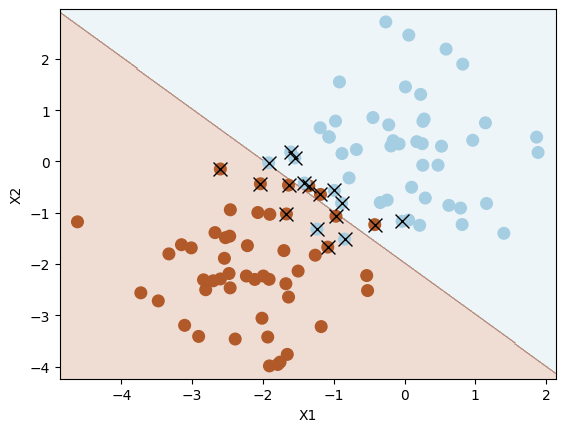

Number of support vectors:  18


In [8]:
plot_svc(svc, X, y)

La región del espacio de características que será asignada a la clase −1 se muestra en azul claro, y la región que será asignada a la clase +1 se muestra en marrón.  
La frontera de decisión entre las dos clases es lineal (porque usamos el argumento `kernel="linear"`).  

Los vectores de soporte se grafican con cruces y las demás observaciones se grafican como círculos; vemos aquí que hay 18 vectores de soporte.  
Podemos determinar sus identidades de la siguiente manera:


In [9]:
svc.support_

array([50, 55, 58, 63, 65, 71, 73, 85, 94,  1,  3, 15, 27, 29, 32, 35, 36,
       43], dtype=int32)

### Ejemplo 1  
1. Cambia el valor del parámetro `cost` a `0.001`.  
   ¿Qué sucede con el número de vectores de soporte?  

2. ¿Y qué pasaría si, en cambio, usamos un valor más grande para el parámetro `cost`?  
   Por ejemplo: `C = 1000`.


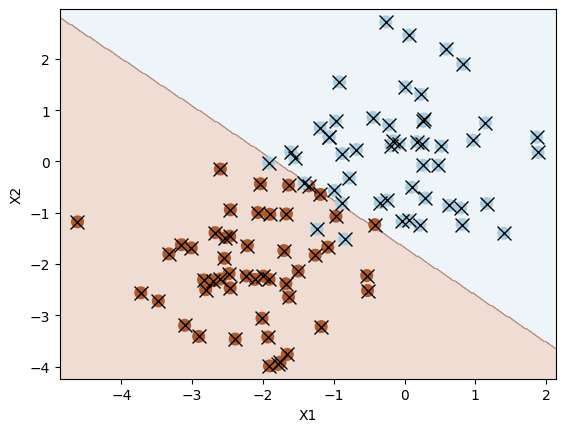

Number of support vectors:  100


In [10]:
svc1 = SVC(C=0.001, kernel='linear')
svc1.fit(X, y)
plot_svc(svc1, X, y)

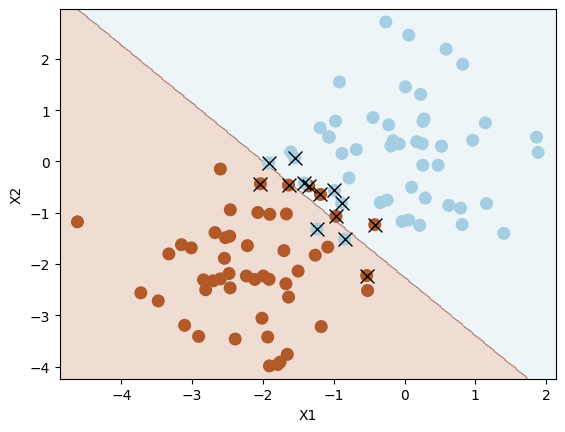

Number of support vectors:  14


In [11]:
svc2 = SVC(C=1000, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

### Ejercicio 1
1. Ahora, usa el siguiente código para generar un nuevo conjunto de datos con 200 observaciones y 2 variables.  
   El código utiliza `train_test_split` para dividir el conjunto de datos en entrenamiento y prueba.  
2. Usa la función `SVC()` para ajustar un clasificador de vectores de soporte sobre el conjunto de entrenamiento.  
3. Emplea la función `plot_svc()` para graficar la frontera de decisión.  
4. Responde:  
   - ¿Cuántos vectores de soporte hay?  
   - ¿Cuál es la tasa de error de clasificación en el conjunto de entrenamiento?  
5. Usa un valor de `C=1` y un kernel `kernel="linear"`.  
6. Finalmente, comenta los resultados obtenidos.  



In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

### Ejercicio 2  
1. Ahora usa el kernel de función de base radial (RBF) para ajustar un clasificador de vectores de soporte sobre este conjunto de datos usando la partición de entrenamiento.  
2. Emplea la función `plot_svc()` para graficar la frontera de decisión.  
3. Responde:  
   - ¿Cuántos vectores de soporte hay?  
   - ¿Cuál es la tasa de error de clasificación en el conjunto de entrenamiento?  
4. Usa un valor de `C=1` y un kernel `kernel="rbf"` con `gamma=1`.  
5. Comenta los resultados obtenidos.

### Ejercicio 3  
1. Ahora utiliza C=100 en lugar de C=1.  
2. Pregúntate:  
   - ¿Cómo afecta esto al número de vectores de soporte?  
   - ¿Cuál es la tasa de error de clasificación en el conjunto de entrenamiento?  
3. Comenta los resultados obtenidos.  

## SVM con múltiples clases

Si la variable de respuesta es un factor que contiene más de dos niveles, entonces la función `svm()` realizará una clasificación multiclase utilizando el enfoque uno contra uno (*one-versus-one*). Exploraremos este escenario generando una tercera clase de observaciones:


Text(0, 0.5, 'XX2')

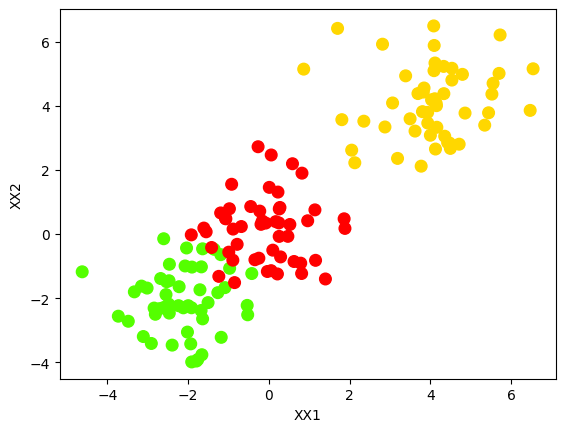

In [12]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

Ajustar un SVM a datos multiclase utiliza una sintaxis idéntica a la de ajustar un modelo simple de dos clases:

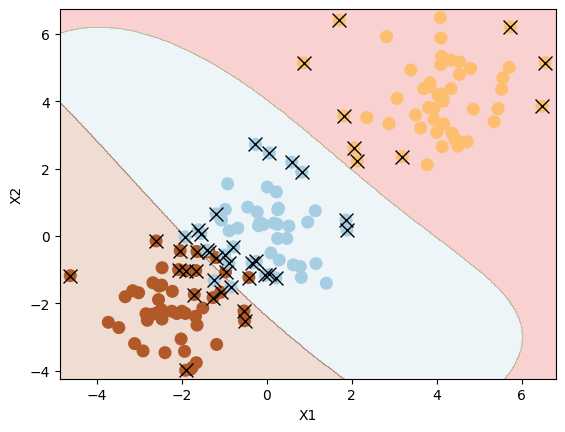

Number of support vectors:  47


In [13]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

### Ejercicio 4
* Usa varios valores del parámetro `cost` y las dos funciones kernel (lineal y de base radial) para ajustar SVMs a este conjunto de datos. Comenta los resultados.


## Aplicación a datos de letras manuscritas

Ahora examinaremos el conjunto de datos [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits),el cual contiene 5,620 muestras de dígitos manuscritos del 0 al 9.  

Puedes usar estos enlaces para descargar los [datos de entrenamiento](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra)  
y los [datos de prueba](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes), y luego cargarlos en Python, o bien obtenerlos desde el repositorio de GitHub del módulo como en el ejemplo a continuación:


In [14]:
X_train = pd.read_csv('https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/optdigits.tra', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

X_test = pd.read_csv('https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/optdigits.tes', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

Verifiquemos las dimensiones de dataset

In [15]:
print(X_train.shape)
print(X_test.shape)

(3823, 64)
(1797, 64)


Este conjunto de datos consiste en imágenes preprocesadas de muestras de escritura manuscrita recopiladas de 43 personas diferentes. Cada imagen fue convertida en una matriz de 8x8 (64 píxeles), que luego se aplanó en un vector de 64 valores numéricos. La última columna contiene la etiqueta de clase para cada dígito. Los conjuntos de entrenamiento y prueba consisten en 3,823 y 1,797 observaciones respectivamente. Veamos cómo se ve uno de estos dígitos:


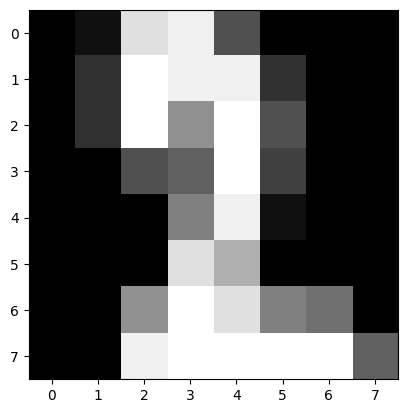

In [16]:
plt.imshow(X_train.values[50].reshape(8,8), cmap="gray")
plt.show()

Ese es un dígito bastante desordenado. Echemos un vistazo a la clase verdadera:


In [17]:
y_train[50]

np.int64(2)

Empecemos con un kernel lineal para ver cómo nos va:


In [21]:
from sklearn.metrics import confusion_matrix

svc = SVC(kernel='linear',C=10)#, gamma=0.00100000, C=100)
svc.fit(X_train, y_train)

# Print a nice confusion matrix
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_df)

     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    0    0    0    0    0    0    0  380    0
9    0    0    0    0    0    0    0    0    0  382


Observamos que no hay errores de entrenamiento. De hecho, esto no es sorprendente, porque el gran número de variables en relación con el número de observaciones implica que es fácil encontrar hiperplanos que separen completamente las clases. Lo que más nos interesa no es el desempeño del clasificador de support vectors en los datos de entrenamiento, sino más bien su desempeño en los datos de prueba:

In [22]:
cm = confusion_matrix(y_test, svc.predict(X_test))
print(pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_))
# Calcular valores falsos
cm_out_diag = ~np.eye(cm.shape[0], dtype=bool)
# Extraer los valores fuera de la diagonal
valores_fuera_diag = cm[cm_out_diag]
# Sumarlos
suma = valores_fuera_diag.sum()
print("")
print("Errors: ",suma)

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    1    0    0    0    0    0    1
1    0  178    7    0    0    0    0    0    9    0
2    0    0  170    5    0    1    0    0    1    0
3    0    0    0  171    0    0    0    0    5    4
4    0    0    0    0  180    0    1    1    0    1
5    1    0    0    2    0  180    0    7    2    3
6    0    3    0    0    0    0  179    0    0    0
7    0    0    0    2    0    0    0  165    0    0
8    0    1    0    1    1    0    1    0  157    1
9    0    0    0    1    0    1    0    6    0  170

Errors:  70


## Ejercicio 5:
Vemos que usar `cost = 10` produce 70 errores en el conjunto de prueba para estos datos. Ahora intenta con varios valores de `cost` y diferentes kernels para ver si puedes mejorar los resultados.  
Comenta tus hallazgos.


### Ejercicio 6: Support Vector Regression (SVR)

Los SVRs se implementan utilizando el objeto `SVR` de sklearn  
(más detalles en: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Usa el dataset Hitters (https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/Hitters.csv) para construir un modelo que prediga el salario en función de las demás variables. Debes hacer tu mejor esfuerzo para producir el mejor modelo posible, probando varios modelos SVR.  
El resultado final de esta tarea debe ser un gráfico de barras de error (errorbar plot) con todos tus modelos reportados (similar al mostrado anteriormente para clasificación). Prueba con varias configuraciones de kernel y valores de $C$.


Debes entregar en un informe de Latex los resultados de los ejercicios.